**Notebook credit**: based on the F. Chollet's original notebook [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb).

# Introduction to Keras and TensorFlow

## The Python landscape for machine learning and deep learning

- [Python](https://www.python.org/) is an interpreted high-level general-purpose programming language.
- [NumPy](https://numpy.org/) is a Python library for manipulating multi-dimensional arrays and matrices. Allows Python to be used for numerical computing.
- [Matplotlib](https://matplotlib.org/) is a Python library for creating plots. Works nicely with NumPy. Its `pyplot` module provides a MATLAB like interface.
- [Scikit-learn](https://scikit-learn.org/) is a Python library built on top of NumPy and Matplotlib. This is the main library for machine learning especially for methods not based on neural networks.
- [TensorFlow](https://www.tensorflow.org/) is a Python library developed by Google for training deep learning models on CPUs, GPUs, and TPUs. TF2 was released in 2019.
- [Keras](https://keras.io/) is built on top of TensorFlow and provides consistent & simple APIs, minimizes the number of user actions required for common use cases, and provides clear & actionable error messages. The author of Keras, Francois Chollet, is also the author of the book *Deep Learning with Python* (2nd ed).




## What's TensorFlow?

Like NumPy, TF's main purpose is to enable engineers/researchers to manipulate numerical tensors. But TensorFlow goes far beyond the scope of NumPy:

- It can *automatically compute the gradient* of any differentiable expression, making it highly suitable for machine learning.
- It *can run not only on CPUs, but also on GPUs and TPUs*, highly parallel hardware accelerators.
- Computation defined in TensorFlow can be *easily distributed across many machines*.
- TensorFlow programs *can be exported to other runtimes*, such as C++, JavaScript (for browser-based applications), or TensorFlow Lite (for applications running on mobile devices or embedded devices), etc. This makes TensorFlow applications easy to deploy in practical settings.

More than just a library, TF is an ecosystem. For example, there is:

- TF-Agents for reinforcement learning research
- TensorFlow Hub for pretrained models
- TensorFlow Quantum for quantum machine learning

## What's Keras?

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/keras_and_tf.png" alt="picture" width="800">

## Keras and TensorFlow: A brief history

- Keras first released March 2015
- TF first released November 2015
- Keras originally built on top of Theano, a precursor of TF
- In late 2015, Keras refactored to allow multiple backend: Theano or TF
- In 2017, CNTK (Microsoft) and MXNet (Amazon) were added as backends
- 2016-2017: Keras becomes well-known as a user-friendly way to develop TF applications
- By late 2017, majority of TF users are using Kera
- In 2018, TF leadership decides to pick Keras as TF's official high-level API
- Keras API is front and center in TensorFlow 2.0, released in September 2019


Nowadays, both Theano and CNTK are out of development, and MXNet is not widely used outside of Amazon. Keras is back to being a single-backend API—on top of TensorFlow.

## Setting up a deep-learning workspace

- Recommended, although not strictly necessary, that you run deep learning code on a modern NVIDIA GPU
- Some applications will be excruciatingly slow on CPU
- Even for applications that can be run on CPU, you’ll generally see the speed-up of 5x-10x by using GPU

To do deep learning on a GPU, you have three options:
1. Buy and install a physical NVIDIA GPU on your workstation.
2. Use GPU instances on Google Cloud or AWS EC2.
3. Use the free GPU runtime from Colaboratory (Colab), a hosted notebook service offered by Google 

In 315, we will use option no. 3. 

- Colaboratory is the easiest way to get started
- Requires no hardware purchase and no software installation—just open a tab in your browser and start coding
- Free version of Colab is only suitable for small workloads

### Jupyter notebooks: The preferred way to run deep-learning experiments

- They’re widely used in the data science and machine learning communities.
- It mixes the ability to execute Python (and many other supported languages including R and Julia) code with rich text-editing capabilities
- Allows you to break up long experiments into smaller pieces that can be executed independently
  - makes development interactive
  - you don’t have to rerun all previous code if something goes wrong later

Regarding origin of the name "Jupyter":


> The name “Jupyter” is a strong reference to Galileo, who detailed his discovery of the Moons of Jupiter in his astronomical notebooks. The name is also a play on the languages Julia, Python, and R, which are pillars of the modern scientific world. [source](https://blog.jupyter.org/i-python-you-r-we-julia-baf064ca1fb6)



### Using Colaboratory

#### First steps with Colaboratory

- Code cells: Shift+Enter will execute them
- Text cells: Shift+Enter will render them. Can use [markdown and HTML](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). Plus you can use LaTeX to typeset equations like $e^{i \pi} + 1 = 0$

#### Installing packages with pip

Colab has many packages including TensorFlow and Keras. A command in a code cell that begins with an exclamation mark passes the command to the shell.

In [1]:
!pip list -v | grep "keras\|tensorflow"

keras                         2.7.0          /usr/local/lib/python3.7/dist-packages pip
keras-vis                     0.4.1          /usr/local/lib/python3.7/dist-packages pip
tensorflow                    2.7.0          /usr/local/lib/python3.7/dist-packages pip
tensorflow-datasets           4.0.1          /usr/local/lib/python3.7/dist-packages pip
tensorflow-estimator          2.7.0          /usr/local/lib/python3.7/dist-packages pip
tensorflow-gcs-config         2.7.0          /usr/local/lib/python3.7/dist-packages pip
tensorflow-hub                0.12.0         /usr/local/lib/python3.7/dist-packages pip
tensorflow-io-gcs-filesystem  0.23.1         /usr/local/lib/python3.7/dist-packages pip
tensorflow-metadata           1.5.0          /usr/local/lib/python3.7/dist-packages pip
tensorflow-probability        0.15.0         /usr/local/lib/python3.7/dist-packages pip


If a package you need isn't installed you can install it using
```
!pip install <package-name>
```
but note that the installation will have to be repeated each time the notebook is run.

#### Using the GPU runtime

To use the GPU runtime with Colab, select `Runtime > Change Runtime Type` in the menu and select GPU for the Hardware Accelerator 

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## First steps with TensorFlow

Training a neural network revolves around the following concepts:

First, low-level tensor manipulations which translate to TensorFlow APIs:
- *Tensors*, including special tensors that store the network’s state (variables)
- *Tensor operations* such as addition, `relu`, `matmul`
- *Backpropagation*, a way to compute the gradient of mathematical expressions (handled in TensorFlow via the `GradientTape` object)

Second, high-level deep learning concepts which translate to Keras APIs:
- *Layers*, which are combined into a *model*
- A *loss function*, which is used by the optimizer to assess how good a model is
- An *optimizer*, which determines how learning proceeds
- *Metrics* to evaluate model performance, such as accuracy
- A *training loop* that performs mini-batch stochastic gradient descent

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [ ]:
x = tf.ones(shape=(2, 1)) # NumPy equivalent: np.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1)) # NumPy equivalent: np.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.14322898]
 [ 1.2620122 ]
 [-2.0269113 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.45047688]
 [0.49984264]
 [0.7007725 ]], shape=(3, 1), dtype=float32)


**NumPy compatibility**

Converting between a TensorFlow tf.Tensors and a NumPy ndarray is easy:

- TensorFlow operations automatically convert NumPy ndarrays to Tensors.
- NumPy operations automatically convert Tensors to NumPy ndarrays.
- Tensors are explicitly converted to NumPy ndarrays using their `.numpy()` method. 

In [ ]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**TensorFlow tensors are not assignable**

In [ ]:
try:
  x = tf.ones(shape=(2, 2))
  x[0, 0] = 0
except Exception as e:
  print(e)

'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment


**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.0190206],
       [ 0.9159901],
       [-0.2999878]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

**Using `assign_sub`**

In [ ]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

Like NumPy, TensorFlow offers many math operations on tensors

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
print("a=\n", a)
b = tf.square(a)    # elementwise square
print("b=\n", b)
c = tf.sqrt(a)      # elementwise square root
print("c=\n", c)
d = b + c           # elementwise sum
print("d=\n", d)
e = tf.matmul(a, b) # matrix multiplication
print("e=\n", e)
e *= d              # elementwise multiplication
print("e=\n", e)

a=
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
b=
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
c=
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
d=
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e=
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e=
 tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### The GradientTape API

**Backpropagation**

Training a model via (minibatch stochastic) gradient descent involves computing gradients of the loss function w.r.t. model parameters. For example, consider the following two dense layer architecture (don't worry if you don't understand everything, we'll introduce Keras fundamentals soon!)

```
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
```

Let `W1, b1, W2, b2` represent the weights and biases inside the two layers. Then the loss value could be expressed in code as

```
loss_value = loss(y_true, softmax(dot(relu(dot(inputs, W1) + b1), W2) + b2))
```

Since all functions involved above--`loss`, `softmax`, matrix multiplication, and `relu`--are differentiable (the `relu` case is not entirely straightforward, we can discuss more if there's interest), we can use _chain rule_ to compute the derivate of `loss_value` w.r.t. model parameters.

**Backpropagation**: application of chain rule to the computation of the gradient values of a neural network

**Automatic differentiation with computation graphs**

Below is the computation graph of the simple two layer NN we saw above.

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/computation_graph_example.png" alt="picture" height="500">

- _Computation graph_ is a data structure at the heart of TensorFlow
- Computation graphs enable us to _treat computation as data_
- An _automatic differentiation_ program receives a computation graph as input and can automatically generate the derivative of the expression it represents

Let's consider a simplified version of the above figure:

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/computation_graph_simple.png" alt="picture" height="400">

- we have only one layer
- all variables are scalars
- we will use absolute value error: `loss_val = abs(y_true - y)`
- we are interested in computing `grad(loss_val, b)` and `grad(loss _val, w)`

Suppose `x = 2`, `y_true = 4` and we want to evaluate the derivatives at `w = 3` and `b = 1`.


Let's first do it "by hand".

$f(w,b) = |y_{true} - (wx + b)| = |4 - (2w + b)|$

**Diff. w.r.t. w**

$f(w) = |4 - (2w + 1)| = g(h(H(w)))$ where $g(u) = |4-u|, h(u) = u+1, H(u) = 2u$

$ \frac{\partial f}{\partial w} = g'(h(H(w))) \times h'(H(w)) \times H'(w) = g'(7) \times h'(6) \times H'(3) = 1 \times 1 \times 2 = 2$

**Diff. w.r.t. b**

$f(b) = |4 - (6 + b)| = g(h(b))$ where $g(u) = |4-u|, h(u) = 6+u$

$ \frac{\partial f}{\partial b} = g'(h(b)) \times h'(b) = g'(7) \times h'(1) = 1 \times 1 = 1$

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

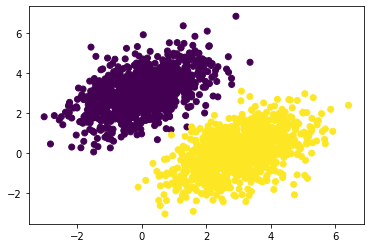

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.7392
Loss at step 1: 0.4365
Loss at step 2: 0.1712
Loss at step 3: 0.1220
Loss at step 4: 0.1078
Loss at step 5: 0.0998
Loss at step 6: 0.0932
Loss at step 7: 0.0873
Loss at step 8: 0.0819
Loss at step 9: 0.0770
Loss at step 10: 0.0725
Loss at step 11: 0.0684
Loss at step 12: 0.0647
Loss at step 13: 0.0613
Loss at step 14: 0.0582
Loss at step 15: 0.0553
Loss at step 16: 0.0527
Loss at step 17: 0.0503
Loss at step 18: 0.0482
Loss at step 19: 0.0462
Loss at step 20: 0.0444
Loss at step 21: 0.0427
Loss at step 22: 0.0412
Loss at step 23: 0.0398
Loss at step 24: 0.0385
Loss at step 25: 0.0374
Loss at step 26: 0.0363
Loss at step 27: 0.0354
Loss at step 28: 0.0345
Loss at step 29: 0.0337
Loss at step 30: 0.0329
Loss at step 31: 0.0323
Loss at step 32: 0.0317
Loss at step 33: 0.0311
Loss at step 34: 0.0306
Loss at step 35: 0.0301
Loss at step 36: 0.0297
Loss at step 37: 0.0293
Loss at step 38: 0.0289
Loss at step 39: 0.0286


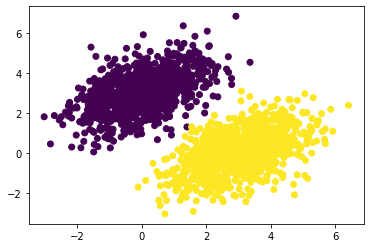

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

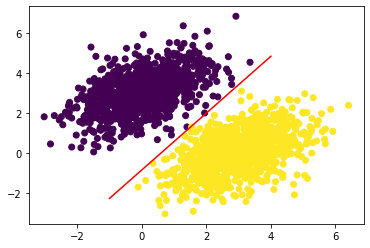

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 10.1697 - binary_accuracy: 0.0840
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 9.7874 - binary_accuracy: 0.0855
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 9.4647 - binary_accuracy: 0.0885
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 9.1500 - binary_accuracy: 0.0935
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 8.8454 - binary_accuracy: 0.0970


In [ ]:
history.history

{'binary_accuracy': [0.08399999886751175,
  0.08550000190734863,
  0.0885000005364418,
  0.09350000321865082,
  0.09700000286102295],
 'loss': [10.169720649719238,
  9.787364959716797,
  9.464683532714844,
  9.150038719177246,
  8.845351219177246]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1167 - binary_accuracy: 0.9593 - val_loss: 0.0379 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0719 - binary_accuracy: 0.9586 - val_loss: 0.0465 - val_binary_accuracy: 0.9900
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0745 - binary_accuracy: 0.9536 - val_loss: 0.4075 - val_binary_accuracy: 0.8533
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0786 - binary_accuracy: 0.9493 - val_loss: 0.0645 - val_binary_accuracy: 0.9567
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0777 - binary_accuracy: 0.9500 - val_loss: 0.0685 - val_binary_accuracy: 0.9700


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[1.4229248 ]
 [1.1668613 ]
 [0.33923623]
 [1.4252131 ]
 [1.1889231 ]
 [0.3233322 ]
 [0.19376889]
 [0.50789195]
 [1.0005254 ]
 [1.1136968 ]]


## Summary